In [1]:
import warnings
warnings.filterwarnings("ignore")

import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
from cycler import cycler


import json
import csv
import pandas as pd
import numpy as np

import networkx as nx

%matplotlib inline

In [2]:
#rcParams default settings
"https://matplotlib.org/stable/tutorials/introductory/customizing.html"

#rcParams settings
plt.style.use('ggplot')

rcParams['font.family'] = 'sans-serif'
rcParams['font.style'] = 'normal'

rcParams['figure.facecolor'] = 'white'

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.transparent'] = True

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.labelsize'] = 20
rcParams['axes.labelcolor'] = 'black'
rcParams['axes.edgecolor'] = 'grey'
rcParams['axes.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlepad'] = 4

rcParams['xtick.color'] = 'grey'
rcParams['ytick.color'] = 'grey'
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 0
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = 0

rcParams['lines.linewidth'] = 3
rcParams['lines.markersize'] = 10

rcParams['grid.color'] = 'grey'
rcParams['grid.linewidth'] = 0.1

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file into a DataFrame
with open('data/out/filtered_tweets_2.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Create a DataFrame from the JSON data
df = pd.DataFrame(data)  # Transpose to set tweets as rows

df


,attachments,author_id,created_at,edit_history_tweet_ids,entities,id,lang,public_metrics,text,username,geo
0,{'media_keys': ['13_1610292861630840833']},51801586,2023-01-03T15:18:41.000Z,[1610294585242300416],"{'annotations': [{'end': 6, 'normalized_text':...",1610294585242300416,en,"{'bookmark_count': 0, 'impression_count': 3864...",New ABB E-mobility home charging solution help...,abbgroupnews,NaN
1,{'media_keys': ['3_1612750081463095296']},51801586,2023-01-10T09:57:29.000Z,[1612750467859378178],"{'annotations': [{'end': 2, 'normalized_text':...",1612750467859378178,en,"{'bookmark_count': 0, 'impression_count': 4887...",ABB #technology to facilitate #energyefficienc...,abbgroupnews,NaN
2,{'media_keys': ['13_1613112174939103235']},51801586,2023-01-11T10:01:06.000Z,[1613113765595320321],"{'annotations': [{'end': 51, 'normalized_text'...",1613113765595320321,en,"{'bookmark_count': 0, 'impression_count': 2559...",Better decisions for a greener data center! Ho...,abbgroupnews,NaN
3,{'media_keys': ['3_1613462741569736704']},51801586,2023-01-12T09:09:45.000Z,[1613463229665271809],"{'annotations': [{'end': 19, 'normalized_text'...",1613463229665271809,en,"{'bookmark_count': 0, 'impression_count': 2087...",ABB Formula E Season 9 goes green in Mexico!\n...,abbgroupnews,NaN
4,{'media_keys': ['13_1613831618141261825']},51801586,2023-01-13T09:41:43.000Z,[1613833662625353729],"{'annotations': [{'end': 7, 'normalized_text':...",1613833662625353729,en,"{'bookmark_count': 0, 'impression_count': 1975...",The #ABB Decoded #podcast with Frank Muehlon i...,abbgroupnews,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6125,{'media_keys': ['3_1734966670068690949']},156646851,2023-12-13T16:03:45.000Z,[1734967350619701374],"{'annotations': [{'end': 62, 'normalized_text'...",1734967350619701374,en,"{'bookmark_count': 1, 'impression_count': 2549...",🌎: 2023 was the hottest year in recorded histo...,vestas,NaN
6126,{'media_keys': ['3_1737133536577015808']},156646851,2023-12-19T15:32:30.000Z,[1737133815452074094],"{'annotations': [{'end': 61, 'normalized_text'...",1737133815452074094,en,"{'bookmark_count': 1, 'impression_count': 1905...","🇪🇺: To deliver clean, affordable, and secure e...",vestas,NaN
6127,{'media_keys': ['3_1737491113206800384']},156646851,2023-12-20T15:13:16.000Z,[1737491360804938169],"{'annotations': [{'end': 160, 'normalized_text...",1737491360804938169,en,"{'bookmark_count': 1, 'impression_count': 4680...",🌎 /🇬🇧 : In the making: one of the largest offs...,vestas,NaN
6128,NaN,156646851,2023-12-22T11:16:00.000Z,[1738156427468763517],"{'annotations': [{'end': 59, 'normalized_text'...",1738156427468763517,en,"{'bookmark_count': 0, 'impression_count': 992,...",🌎/🇬🇧: Partnering with @RWE_AG to take the Nor...,vestas,NaN


In [27]:
# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    attachments = row['attachments']
    if type(attachments) == dict:
        for key, value in attachments.items():
            # Check if column with key name already exists
            if key in df.columns:
                # Update existing column value
                df.at[index, f'attachments_{key}'] = value
            else:
                # Create new column and fill with NaN
                df[f'attachments_{key}'] = pd.Series([value if i == index else None for i in range(len(df))])
    entities = row['entities']
    if type(entities) == dict:
        for key, value in entities.items():
            if key in df.columns:
                # Update existing column value
                df.at[index, f'entities_{key}'] = value
            else:
                # Create new column and fill with NaN
                df[f'entities_{key}'] = pd.Series([value if i == index else None for i in range(len(df))])
    public_metrics = row['public_metrics']
    if type(public_metrics) == dict:
        for key, value in public_metrics.items():
            if key in df.columns:
                # Update existing column value
                df.at[index, f'public_metrics_{key}'] = value
            else:
                # Create new column and fill with NaN
                df[f'public_metrics_{key}'] = pd.Series([value if i == index else None for i in range(len(df))])        

In [28]:
df.columns

Index(['attachments', 'author_id', 'created_at', 'edit_history_tweet_ids',
       'entities', 'id', 'lang', 'public_metrics', 'text', 'username', 'geo',
       'attachments_media_keys', 'entities_annotations', 'entities_hashtags',
       'entities_urls', 'public_metrics_bookmark_count',
       'public_metrics_impression_count', 'public_metrics_like_count',
       'public_metrics_quote_count', 'public_metrics_reply_count',
       'public_metrics_retweet_count', 'entities_mentions',
       'attachments_poll_ids', 'entities_cashtags',
       'attachments_media_source_tweet_id'],
      dtype='object')

In [29]:
df.drop(columns=['attachments', 'entities', 'public_metrics'], inplace=True)

In [30]:
df.columns

Index(['author_id', 'created_at', 'edit_history_tweet_ids', 'id', 'lang',
       'text', 'username', 'geo', 'attachments_media_keys',
       'entities_annotations', 'entities_hashtags', 'entities_urls',
       'public_metrics_bookmark_count', 'public_metrics_impression_count',
       'public_metrics_like_count', 'public_metrics_quote_count',
       'public_metrics_reply_count', 'public_metrics_retweet_count',
       'entities_mentions', 'attachments_poll_ids', 'entities_cashtags',
       'attachments_media_source_tweet_id'],
      dtype='object')

In [31]:
df['entities_annotations']

0                                                    None
1                                                    None
2                                                    None
3                                                    None
4                                                    None
                              ...                        
6125                                                 None
6126                                                 None
6127                                                 None
6128                                                 None
6129    [{'end': 48, 'normalized_text': 'U.S.', 'proba...
Name: entities_annotations, Length: 6130, dtype: object

In [32]:
for index, row in df.iterrows():
    annotations = row['entities_annotations']
    if annotations:
        for d in annotations:
            for key, value in d.items():
                # Check if column with key name already exists
                if key in df.columns:
                    # Update existing column value
                    df.at[index, f'annotations_{key}'] = value
                else:
                    # Create new column and fill with NaN
                    df[f'annotations_{key}'] = pd.Series([value if i == index else None for i in range(len(df))])

In [33]:
df.head()

,author_id,created_at,edit_history_tweet_ids,id,lang,text,username,geo,attachments_media_keys,entities_annotations,...,public_metrics_retweet_count,entities_mentions,attachments_poll_ids,entities_cashtags,attachments_media_source_tweet_id,annotations_end,annotations_normalized_text,annotations_probability,annotations_start,annotations_type
0,51801586,2023-01-03T15:18:41.000Z,[1610294585242300416],1610294585242300416,en,New ABB E-mobility home charging solution help...,abbgroupnews,NaN,None,None,...,NaN,None,None,None,None,NaN,None,NaN,NaN,None
1,51801586,2023-01-10T09:57:29.000Z,[1612750467859378178],1612750467859378178,en,ABB #technology to facilitate #energyefficienc...,abbgroupnews,NaN,None,None,...,NaN,None,None,None,None,NaN,None,NaN,NaN,None
2,51801586,2023-01-11T10:01:06.000Z,[1613113765595320321],1613113765595320321,en,Better decisions for a greener data center! Ho...,abbgroupnews,NaN,None,None,...,NaN,None,None,None,None,NaN,None,NaN,NaN,None
3,51801586,2023-01-12T09:09:45.000Z,[1613463229665271809],1613463229665271809,en,ABB Formula E Season 9 goes green in Mexico!\n...,abbgroupnews,NaN,None,None,...,NaN,None,None,None,None,NaN,None,NaN,NaN,None
4,51801586,2023-01-13T09:41:43.000Z,[1613833662625353729],1613833662625353729,en,The #ABB Decoded #podcast with Frank Muehlon i...,abbgroupnews,NaN,None,None,...,NaN,None,None,None,None,NaN,None,NaN,NaN,None


In [34]:
for index, row in df.iterrows():
    annotations = row['entities_urls']
    if annotations:
        for d in annotations:
            for key, value in d.items():
                # Check if column with key name already exists
                if key in df.columns:
                    # Update existing column value
                    df.at[index, f'urls_{key}'] = value
                else:
                    # Create new column and fill with NaN
                    df[f'urls_{key}'] = pd.Series([value if i == index else None for i in range(len(df))])

In [35]:
df.head()

,author_id,created_at,edit_history_tweet_ids,id,lang,text,username,geo,attachments_media_keys,entities_annotations,...,urls_description,urls_display_url,urls_end,urls_expanded_url,urls_start,urls_status,urls_title,urls_unwound_url,urls_url,urls_media_key
0,51801586,2023-01-03T15:18:41.000Z,[1610294585242300416],1610294585242300416,en,New ABB E-mobility home charging solution help...,abbgroupnews,NaN,None,None,...,None,None,NaN,None,NaN,NaN,None,None,None,None
1,51801586,2023-01-10T09:57:29.000Z,[1612750467859378178],1612750467859378178,en,ABB #technology to facilitate #energyefficienc...,abbgroupnews,NaN,None,None,...,None,None,NaN,None,NaN,NaN,None,None,None,None
2,51801586,2023-01-11T10:01:06.000Z,[1613113765595320321],1613113765595320321,en,Better decisions for a greener data center! Ho...,abbgroupnews,NaN,None,None,...,None,None,NaN,None,NaN,NaN,None,None,None,None
3,51801586,2023-01-12T09:09:45.000Z,[1613463229665271809],1613463229665271809,en,ABB Formula E Season 9 goes green in Mexico!\n...,abbgroupnews,NaN,None,None,...,None,None,NaN,None,NaN,NaN,None,None,None,None
4,51801586,2023-01-13T09:41:43.000Z,[1613833662625353729],1613833662625353729,en,The #ABB Decoded #podcast with Frank Muehlon i...,abbgroupnews,NaN,None,None,...,None,None,NaN,None,NaN,NaN,None,None,None,None


In [36]:
min(df.created_at)

'2023-01-01T09:00:07.000Z'

In [37]:
max(df.created_at)

'2023-12-31T17:15:28.000Z'

In [38]:
len(df)

6130

In [39]:
len(df.author_id.unique())

27

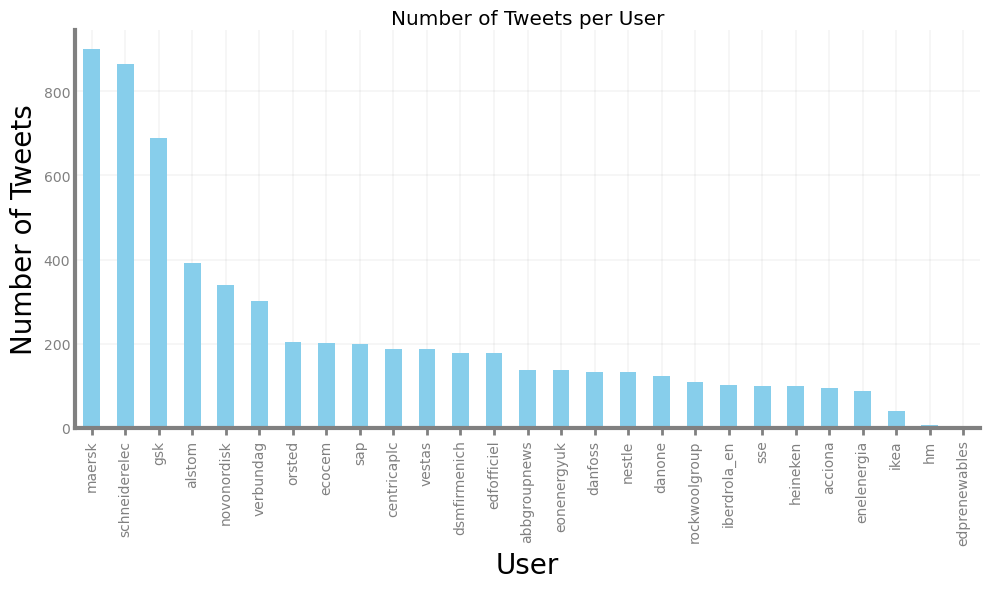

username
maersk           902
schneiderelec    866
gsk              688
alstom           393
novonordisk      339
verbundag        302
orsted           203
ecocem           201
sap              200
centricaplc      188
vestas           187
dsmfirmenich     179
edfofficiel      178
abbgroupnews     138
eonenergyuk      137
danfoss          133
nestle           132
danone           122
rockwoolgroup    109
iberdrola_en     101
sse              100
heineken         100
acciona           95
enelenergia       88
ikea              41
hm                 7
edprenewables      1
Name: count, dtype: int64


In [41]:
# Compute the number of total tweets per username/user_id
tweet_counts = df['username'].value_counts()

# Plot the results using a bar chart
plt.figure(figsize=(10, 6))
tweet_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Tweets per User')
plt.xlabel('User')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

print(tweet_counts)

In [66]:
df['created_at']

0       2023-10-09T14:00:24.000Z
1       2023-05-27T14:30:01.000Z
2       2023-06-05T19:29:41.000Z
3       2023-11-25T12:00:07.000Z
4       2023-08-09T11:52:18.000Z
                  ...           
2221    2023-12-13T14:10:41.000Z
2222    2023-08-15T12:44:00.000Z
2223    2023-08-23T14:53:00.000Z
2224    2023-11-02T07:48:00.000Z
2225    2023-12-05T08:32:54.000Z
Name: created_at, Length: 2226, dtype: object

In [68]:
df['date'] = pd.to_datetime(df['created_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [47]:
# 2. Number of tweets per day/week/month
df['created_at'] = pd.to_datetime(df['created_at'])
daily_tweet_counts = df.groupby(df['created_at'].dt.date).size()
weekly_tweet_counts = df.groupby(df['created_at'].dt.isocalendar().week).size()
monthly_tweet_counts = df.groupby(df['created_at'].dt.month).size()

In [42]:
min(df.created_at.loc[df.username == 'heineken'])

'2023-11-05T12:00:01.000Z'

In [43]:
max(df.created_at.loc[df.username == 'heineken'])

'2023-11-17T15:37:43.000Z'

In [44]:
df = df.loc[df.username != 'heineken']

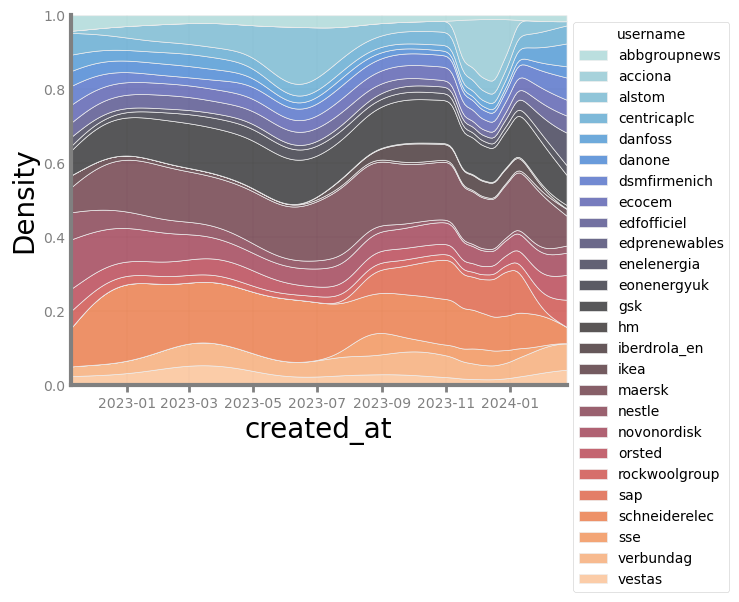

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("icefire", n_colors=len(df.username.unique()))
ax = sns.kdeplot(data=df, x="created_at", hue="username", multiple="fill", legend=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


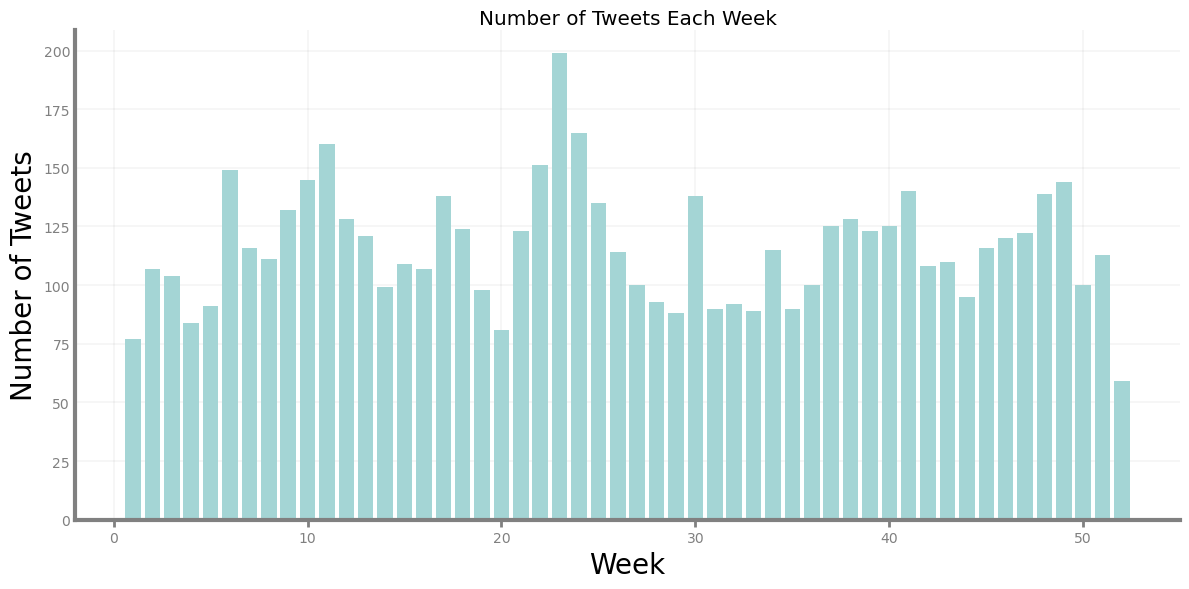

In [79]:
weekly_tweet_counts = df.groupby(df['created_at'].dt.isocalendar().week).size()

# Reset index to make 'week' and 'username' as columns
weekly_tweet_counts_df = weekly_tweet_counts.reset_index()
weekly_tweet_counts_df = weekly_tweet_counts_df.rename(columns={0: 'count'})

# Plot using Seaborn
plt.figure(figsize=(12, 6))
plt.bar(x = weekly_tweet_counts_df['week'], height = weekly_tweet_counts_df['count'])
plt.title('Number of Tweets Each Week')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.tight_layout()
plt.show()


Text(0.5, 0, 'Date')

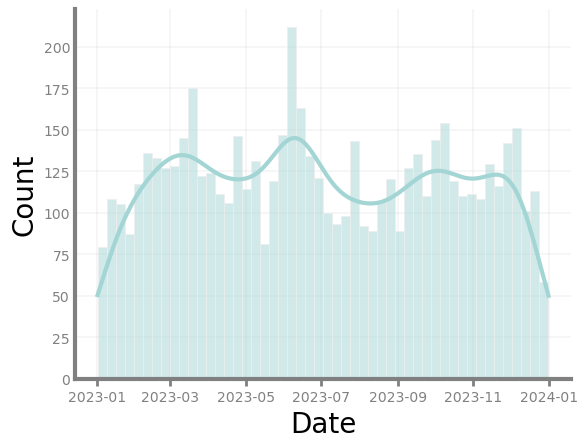

In [92]:
#number of tweets timeseries
# sns.set_palette("icefire", n_colors = len(df.username.unique()))
ax = sns.histplot(data=df, x="created_at", bins=50, kde=True)
plt.xlabel("Date")
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
